In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("datasets/cleaned_dataset.csv")
cleaned_df = df.copy()
print(cleaned_df.head())
cleaned_df.columns

   _STATE  GENHLTH  HLTHPLN1  CVDINFR4  CVDCRHD4  CVDSTRK3  CHCSCNCR  \
0    22.0      4.0       2.0       2.0       2.0       2.0       2.0   
1    31.0      1.0       1.0       2.0       2.0       1.0       2.0   
2    11.0      1.0       1.0       2.0       2.0       2.0       2.0   
3    66.0      3.0       2.0       2.0       2.0       2.0       2.0   
4    20.0      2.0       2.0       2.0       2.0       2.0       2.0   

   CHCOCNCR  ADDEPEV2  CHCKIDNY  ...  _AGE_G  _BMI5CAT  _EDUCAG  _INCOMG  \
0       2.0       2.0       2.0  ...     5.0       4.0      2.0      2.0   
1       2.0       1.0       2.0  ...     6.0       2.0      2.0      1.0   
2       2.0       2.0       2.0  ...     3.0       4.0      2.0     -1.0   
3       2.0       2.0       2.0  ...     5.0       2.0      3.0      1.0   
4       2.0       2.0       2.0  ...     3.0       2.0      2.0      3.0   

   _SMOKER3  _TOTINDA  PHYSHLTH_30_day_range  MENTHLTH_30_day_range  \
0       2.0       2.0                  

Index(['_STATE', 'GENHLTH', 'HLTHPLN1', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3',
       'CHCSCNCR', 'CHCOCNCR', 'ADDEPEV2', 'CHCKIDNY', 'DIABETE3', 'SEX',
       'MARITAL', 'QLACTLM2', 'USENOW3', 'EXERANY2', 'PNEUVAC3', '_RFHLTH',
       '_ASTHMS1', '_DRDXAR1', '_AGE_G', '_BMI5CAT', '_EDUCAG', '_INCOMG',
       '_SMOKER3', '_TOTINDA', 'PHYSHLTH_30_day_range',
       'MENTHLTH_30_day_range', 'ALCDAY5_last_30_days', 'month_year_datetime'],
      dtype='object')

<Axes: xlabel='DIABETE3'>

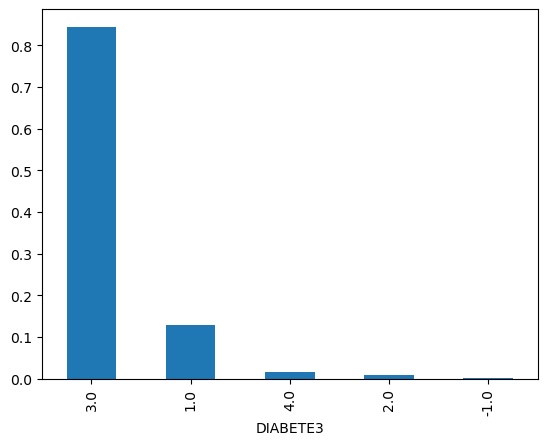

In [4]:
# Plot the distribution of the DIABETE3 column
cleaned_df["DIABETE3"].value_counts(normalize=True).plot(kind="bar")

In [7]:
# Get numeric columns for correlation
numeric_columns = cleaned_df.select_dtypes(include="number").columns.to_list()

# Correlation matrix
correlation_matrix = cleaned_df[numeric_columns].corr()
print(correlation_matrix)

                         _STATE   GENHLTH  HLTHPLN1  CVDINFR4  CVDCRHD4  \
_STATE                 1.000000  0.015312  0.003430  0.000366 -0.001006   
GENHLTH                0.015312  1.000000  0.045535 -0.184952 -0.194827   
HLTHPLN1               0.003430  0.045535  1.000000  0.022948  0.032479   
CVDINFR4               0.000366 -0.184952  0.022948  1.000000  0.379988   
CVDCRHD4              -0.001006 -0.194827  0.032479  0.379988  1.000000   
CVDSTRK3               0.002954 -0.156431  0.019854  0.205946  0.176733   
CHCSCNCR               0.023878 -0.044726  0.054403  0.077218  0.091455   
CHCOCNCR               0.016229 -0.130970  0.040960  0.080754  0.084532   
ADDEPEV2              -0.006931 -0.220865 -0.022132  0.072086  0.079646   
CHCKIDNY               0.008984 -0.135978  0.010698  0.113373  0.122298   
DIABETE3              -0.002984 -0.251645  0.029634  0.131596  0.134530   
SEX                   -0.001656  0.014250 -0.031856  0.058884  0.040060   
MARITAL               -0.

In [51]:
for column in numeric_columns:
    correlation_matrix = cleaned_df["DIABETE3"].corr(cleaned_df[column])
    if abs(correlation_matrix) > 0.3:
        print(f"Moderate or Strong correlation between DIABETE3 and {column}: {correlation_matrix}")

Moderate or Strong correlation between DIABETE3 and DIABETE3: 1.0


In [52]:
cleaned_df.columns

Index(['_STATE', 'GENHLTH', 'HLTHPLN1', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3',
       'CHCSCNCR', 'CHCOCNCR', 'ADDEPEV2', 'CHCKIDNY', 'DIABETE3', 'SEX',
       'MARITAL', 'QLACTLM2', 'USENOW3', 'EXERANY2', 'PNEUVAC3', '_RFHLTH',
       '_ASTHMS1', '_DRDXAR1', '_AGE_G', '_BMI5CAT', '_EDUCAG', '_INCOMG',
       '_SMOKER3', '_TOTINDA', 'PHYSHLTH_30_day_range',
       'MENTHLTH_30_day_range', 'ALCDAY5_last_30_days', 'month_year_datetime'],
      dtype='object')

Reviewing the correlation results DIABETE3 has no moderate, strong, or perfect correlation between any of the remaining columns from the combined and filtered dataset.

The remaining columns while many may be comorbidity conditions, the majority are not indicative of lifestyle. Most of the columns from the original dataset that address lifestyle, such as dietary, exercise, doctors, etc do not exist across all 5 years.

Determination that the survey results over multiple years does not provide an adequate amount of information to preceed with this data.

Will shift to a dataset that uses the same source but is only using 2015.

In [48]:
df = pd.read_csv("datasets/diabetes_binary_health_indicators_BRFSS2015.csv")
diabetes_binary_2015 = df.copy()
print(diabetes_binary_2015.head())
diabetes_binary_2015.shape


   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0   

(253680, 22)

In [50]:
diabetes_correlation_matrix = diabetes_binary_2015.corr()
print(diabetes_correlation_matrix)

                      Diabetes_binary    HighBP  HighChol  CholCheck  \
Diabetes_binary              1.000000  0.263129  0.200276   0.064761   
HighBP                       0.263129  1.000000  0.298199   0.098508   
HighChol                     0.200276  0.298199  1.000000   0.085642   
CholCheck                    0.064761  0.098508  0.085642   1.000000   
BMI                          0.216843  0.213748  0.106722   0.034495   
Smoker                       0.060789  0.096991  0.091299  -0.009929   
Stroke                       0.105816  0.129575  0.092620   0.024158   
HeartDiseaseorAttack         0.177282  0.209361  0.180765   0.044206   
PhysActivity                -0.118133 -0.125267 -0.078046   0.004190   
Fruits                      -0.040779 -0.040555 -0.040859   0.023849   
Veggies                     -0.056584 -0.061266 -0.039874   0.006121   
HvyAlcoholConsump           -0.057056 -0.003972 -0.011543  -0.023730   
AnyHealthcare                0.016255  0.038425  0.042230   0.11

In [53]:
diabetes_binary_2015.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [56]:
# Create X and y variables
X = diabetes_binary_2015.drop(columns=["Diabetes_binary"])
y = diabetes_binary_2015["Diabetes_binary"]

In [68]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [70]:
# Create a linear regression model
linear_regression = sm.OLS(y_train, X_train).fit()

In [71]:
# Create a variable to hold the p-values of all columns sorted in ascending order
p_values = linear_regression.pvalues.sort_values()
p_values

HighBP                   0.000000e+00
BMI                      0.000000e+00
GenHlth                  0.000000e+00
HighChol                2.054185e-289
HeartDiseaseorAttack    2.916528e-170
Education               2.579884e-112
DiffWalk                1.253183e-106
Income                   2.882620e-77
HvyAlcoholConsump        5.652343e-66
Age                      5.008820e-60
Stroke                   1.422433e-23
PhysActivity             6.031517e-23
NoDocbcCost              1.488097e-17
Sex                      3.558100e-17
Smoker                   2.923905e-16
AnyHealthcare            7.720645e-14
MentHlth                 1.610095e-13
Veggies                  3.105921e-09
CholCheck                2.627081e-05
Fruits                   7.109919e-03
PhysHlth                 4.108298e-02
dtype: float64

In [72]:
# Filter columns with p-values less than 0.05
select_cols = p_values.loc[p_values < 0.05]

# Results index
select_cols.index

Index(['HighBP', 'BMI', 'GenHlth', 'HighChol', 'HeartDiseaseorAttack',
       'Education', 'DiffWalk', 'Income', 'HvyAlcoholConsump', 'Age', 'Stroke',
       'PhysActivity', 'NoDocbcCost', 'Sex', 'Smoker', 'AnyHealthcare',
       'MentHlth', 'Veggies', 'CholCheck', 'Fruits', 'PhysHlth'],
      dtype='object')

In [73]:
# Create an X variable with all features and another with only the selected features

X_full = X
X_sel = X[select_cols.index]

In [74]:
# Split the data into training and testing sets
X_full_train, X_full_test, X_sel_train, X_sel_test, y_train, y_test = train_test_split(X_full, X_sel, y)

In [75]:
# Train two models using the different X variables
lr1 = LinearRegression()
lr2 = LinearRegression()

# Fit the models
lr1.fit(X_full_train, y_train)
lr2.fit(X_sel_train, y_train)

LinearRegression()

In [76]:
# Bootcamp provided function
def r2_adj(x, y, model):
    r2 = model.score(x,y)
    n_cols = x.shape[1]
    return 1 - (1 - r2) * (len(y) - 1) / (len(y) - n_cols - 1)

In [77]:
# Compare adjusted R2 scores
adj_score1 = r2_adj(X_full_test, y_test, lr1)
adj_score2 = r2_adj(X_sel_test, y_test, lr2)
print(f"1 Feature Adjusted R2: {adj_score1}")
print(f"2 Feature Adjusted R2: {adj_score2}")

1 Feature Adjusted R2: 0.1608751033135012
2 Feature Adjusted R2: 0.16087510331349786


In [81]:
# KNN Classifier
knc_model = KNeighborsClassifier()

In [82]:
# Train model
knc_model.fit(X_train, y_train)
knc_y_pred = knc_model.predict(X_test)

In [84]:
# Classification report
print(classification_report(y_test, knc_y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     54675
         1.0       0.14      0.02      0.04      8745

    accuracy                           0.85     63420
   macro avg       0.50      0.50      0.48     63420
weighted avg       0.76      0.85      0.80     63420



In [88]:
# Create model for grid tuning

knc_grid_tuned_model = KNeighborsClassifier()
param_grid = {
    "n_neighbors": [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
    "weights": ["uniform", "distance"],
    "leaf_size": [10, 50, 100, 500]
}

grid_search_cv = GridSearchCV(knc_grid_tuned_model, param_grid, verbose=3)

In [89]:
# Fit the model 
grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END leaf_size=10, n_neighbors=1, weights=uniform;, score=0.756 total time=   2.6s
[CV 2/5] END leaf_size=10, n_neighbors=1, weights=uniform;, score=0.765 total time=   2.5s
[CV 3/5] END leaf_size=10, n_neighbors=1, weights=uniform;, score=0.759 total time=   2.5s
[CV 4/5] END leaf_size=10, n_neighbors=1, weights=uniform;, score=0.761 total time=   2.5s
[CV 5/5] END leaf_size=10, n_neighbors=1, weights=uniform;, score=0.758 total time=   2.5s
[CV 1/5] END leaf_size=10, n_neighbors=1, weights=distance;, score=0.756 total time=   2.1s
[CV 2/5] END leaf_size=10, n_neighbors=1, weights=distance;, score=0.765 total time=   2.2s
[CV 3/5] END leaf_size=10, n_neighbors=1, weights=distance;, score=0.759 total time=   2.1s
[CV 4/5] END leaf_size=10, n_neighbors=1, weights=distance;, score=0.761 total time=   2.2s
[CV 5/5] END leaf_size=10, n_neighbors=1, weights=distance;, score=0.758 total time=   2.1s
[CV 1/5] END leaf_size=

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 50, 100, 500],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [90]:
# List the best parameters
print(grid_search_cv.best_params_)

{'leaf_size': 10, 'n_neighbors': 19, 'weights': 'uniform'}


In [91]:
# Print the classification report
grid_y_pred = grid_search_cv.predict(X_test)
print(classification_report(y_test, grid_y_pred))

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93     54675
         1.0       0.17      0.00      0.00      8745

    accuracy                           0.86     63420
   macro avg       0.51      0.50      0.46     63420
weighted avg       0.77      0.86      0.80     63420

